In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
model_data = pd.read_csv('feb_134_data.csv')

In [3]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               134 non-null    object 
 1   compound           134 non-null    float64
 2   neg                134 non-null    float64
 3   neu                134 non-null    float64
 4   pos                134 non-null    float64
 5   subjectivity       134 non-null    float64
 6   polarity           134 non-null    float64
 7   sentiment          134 non-null    object 
 8   tweet_vol          134 non-null    int64  
 9   low                134 non-null    float64
 10  high               134 non-null    float64
 11  open               134 non-null    float64
 12  close              134 non-null    float64
 13  volume             134 non-null    float64
 14  google_trends_btc  134 non-null    int64  
 15  returns            133 non-null    float64
dtypes: float64(12), int64(2), 

In [4]:
model_data.head()

,date,compound,neg,neu,pos,subjectivity,polarity,sentiment,tweet_vol,low,high,open,close,volume,google_trends_btc,returns
0,2021-02-05 10:00:00,0.318018,0.000000,0.885818,0.114182,0.092424,0.077273,positive,11,37239.42,37676.38,37278.08,37441.27,544.936834,24,-0.007356
1,2021-02-05 11:00:00,0.111397,0.034580,0.893739,0.071648,0.252381,0.101073,positive,88,37435.00,37750.00,37441.27,37717.69,394.873523,25,-0.004821
2,2021-02-05 12:00:00,0.223211,0.023928,0.873676,0.102367,0.286397,0.111237,positive,139,37581.31,38177.84,37719.99,37899.97,1148.279043,26,-0.011253
3,2021-02-05 13:00:00,0.118976,0.030611,0.899023,0.070359,0.260310,0.084154,positive,131,37838.26,38348.99,37892.46,38328.88,853.451451,27,0.004460
4,2021-02-05 14:00:00,0.149907,0.028931,0.896469,0.074594,0.290310,0.128863,positive,160,38032.00,38342.60,38328.89,38158.31,1242.494873,29,0.004157


In [5]:
import matplotlib.pyplot as plt
import dataframe_image as dfi

desc = model_data.head(4)

dfi.export(desc, 'top_4_df.png')

In [6]:
model_data.set_index('date', inplace = True)

In [7]:
model_data.tail()

,compound,neg,neu,pos,subjectivity,polarity,sentiment,tweet_vol,low,high,open,close,volume,google_trends_btc,returns
date,,,,,,,,,,,,,,,
2021-02-10 18:00:00,0.202081,0.028723,0.876609,0.094683,0.273887,0.099203,positive,202,44874.50,45250.00,45050.01,45151.47,965.354152,55,-0.002180
2021-02-10 19:00:00,0.150301,0.041188,0.861889,0.096917,0.298256,0.117599,positive,144,44500.00,45292.00,45142.02,45250.02,1171.186635,56,0.014934
2021-02-10 20:00:00,0.142981,0.034622,0.884547,0.080831,0.301485,0.109621,positive,148,44462.93,45291.98,45250.01,44579.28,947.446787,57,-0.010333
2021-02-10 21:00:00,0.206070,0.037814,0.858731,0.103434,0.276084,0.076539,positive,145,44380.00,45100.62,44579.28,45042.31,888.808292,58,-0.004532
2021-02-10 22:00:00,0.194272,0.027162,0.879831,0.093037,0.216364,0.083294,positive,136,44933.24,45253.75,45034.81,45246.90,499.648788,57,NaN


In [8]:
model_data =model_data.iloc[:, :-1]

## Feature Selection

### F Regression

In [9]:
def get_model_features(data):
    
    
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression
    
    X = data.drop(['close','sentiment'], axis = 1) #independent columns
    #X = data.drop(['close'], axis = 1) #independent columns
    y = data['close'] 
    
    #apply SelectKBest class to select top 10 best features
    bestfeatures = SelectKBest(score_func=f_regression,k=5)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    
    #join two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Features','Score']  #naming the dataframe columns
    sorted_features = featureScores.sort_values(by ="Score", ascending = False)
    top_five = sorted_features.head(10)
    f, ax = plt.subplots()

    x = top_five['Features'].to_list()
    l = [range(0,len(x))]

    ax.bar(top_five['Features'], top_five['Score'])
    ax.set_xticklabels(x,rotation = 'vertical')

    return top_five['Features'].to_list()


<ipython-input-9-f8cf9b33c2c4>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation = 'vertical')


['high',
 'low',
 'open',
 'google_trends_btc',
 'tweet_vol',
 'volume',
 'subjectivity',
 'pos',
 'polarity',
 'compound']

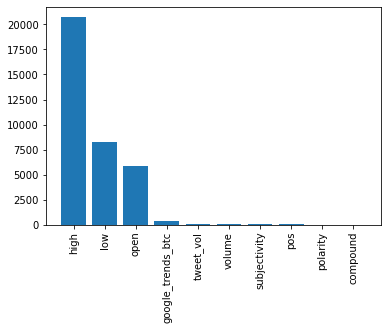

In [10]:
get_model_features(model_data)

In [11]:
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
# The target variable is 'quality'.
#X = model_data.drop(['close','low','high','open'], axis = 1) #independent columns
X = model_data.drop(['close','sentiment'], axis = 1) #independent columns
y = model_data['close']   #target column
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=7, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=7, n_estimators=10, random_state=0)

In [12]:
X_test.mean()

compound                 0.161822
neg                      0.033576
neu                      0.879586
pos                      0.086830
subjectivity             0.287401
polarity                 0.109994
tweet_vol              140.703704
low                  41194.514074
high                 41888.849630
open                 41518.322963
volume                 990.311851
google_trends_btc       45.222222
dtype: float64

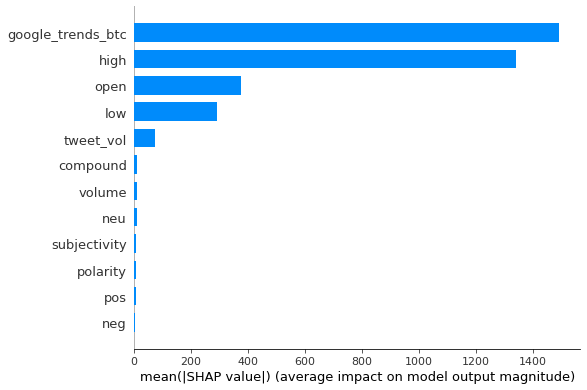

In [13]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [14]:
# desc = pd. DataFrame(X_train.mean())
# desc.columns = ['mean']
# dfi.export(desc, 'X_train.png')

In [15]:
 model_data

,compound,neg,neu,pos,subjectivity,polarity,sentiment,tweet_vol,low,high,open,close,volume,google_trends_btc
date,,,,,,,,,,,,,,
2021-02-05 10:00:00,0.318018,0.000000,0.885818,0.114182,0.092424,0.077273,positive,11,37239.42,37676.38,37278.08,37441.27,544.936834,24
2021-02-05 11:00:00,0.111397,0.034580,0.893739,0.071648,0.252381,0.101073,positive,88,37435.00,37750.00,37441.27,37717.69,394.873523,25
2021-02-05 12:00:00,0.223211,0.023928,0.873676,0.102367,0.286397,0.111237,positive,139,37581.31,38177.84,37719.99,37899.97,1148.279043,26
2021-02-05 13:00:00,0.118976,0.030611,0.899023,0.070359,0.260310,0.084154,positive,131,37838.26,38348.99,37892.46,38328.88,853.451451,27
2021-02-05 14:00:00,0.149907,0.028931,0.896469,0.074594,0.290310,0.128863,positive,160,38032.00,38342.60,38328.89,38158.31,1242.494873,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-10 18:00:00,0.202081,0.028723,0.876609,0.094683,0.273887,0.099203,positive,202,44874.50,45250.00,45050.01,45151.47,965.354152,55
2021-02-10 19:00:00,0.150301,0.041188,0.861889,0.096917,0.298256,0.117599,positive,144,44500.00,45292.00,45142.02,45250.02,1171.186635,56
2021-02-10 20:00:00,0.142981,0.034622,0.884547,0.080831,0.301485,0.109621,positive,148,44462.93,45291.98,45250.01,44579.28,947.446787,57


In [16]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()
S = X

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)
shap_plot(1)

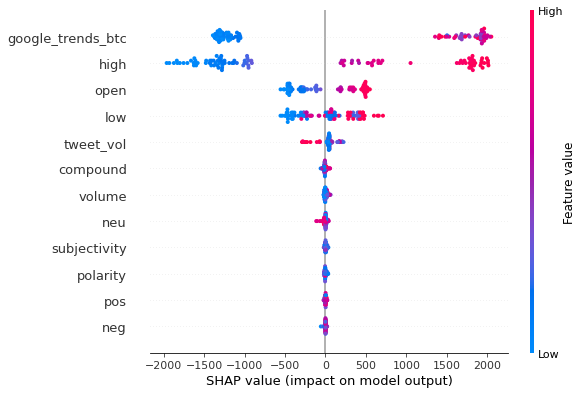

In [17]:
import matplotlib.pyplot as plt
#f = plt.figure()
shap.summary_plot(shap_values, X_train)

In [18]:
from sklearn.preprocessing import MinMaxScaler
features = model_data.drop('sentiment', axis =1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(features )
scaled = pd.DataFrame(scaled, columns = features.columns)
scaled.head()

,compound,neg,neu,pos,subjectivity,polarity,tweet_vol,low,high,open,close,volume,google_trends_btc
0,1.000000,0.000000,0.618968,0.861444,0.000000,0.188306,0.000000,0.000000,0.000000,0.000000,0.003761,0.027104,0.00
1,0.316744,0.387697,0.680491,0.340123,0.362445,0.287799,0.084708,0.019085,0.006996,0.014952,0.029376,0.010521,0.01
2,0.686491,0.268275,0.524653,0.716634,0.439523,0.330288,0.140814,0.033362,0.047651,0.040490,0.046267,0.093779,0.02
3,0.341809,0.343199,0.721538,0.324325,0.380412,0.217072,0.132013,0.058435,0.063914,0.056293,0.086012,0.061198,0.03
4,0.444090,0.324370,0.701698,0.376231,0.448389,0.403968,0.163916,0.077340,0.063307,0.096280,0.070206,0.104191,0.05


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb

#X = model_data.drop(['close','low','high','open'], axis = 1) #independent columns
X = scaled.drop(['close'], axis = 1) #independent columns
Y = scaled['close'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
        test_size = 0.25, random_state = 1)
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, Y_train)

# The SHAP Values
import shap
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

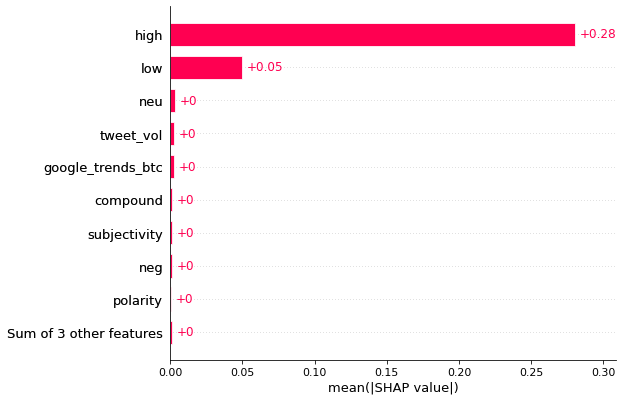

In [20]:
shap.plots.bar(shap_values, max_display=10)

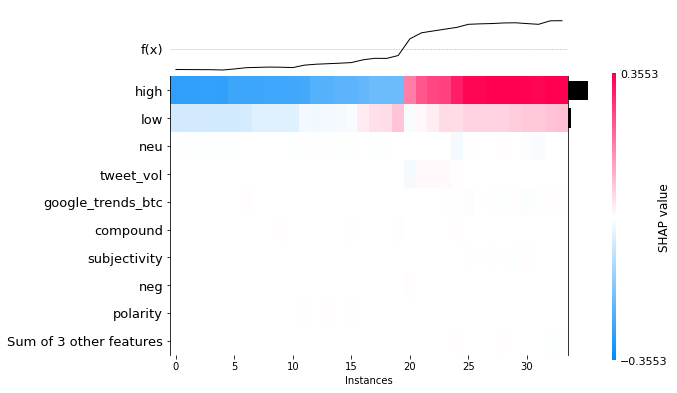

In [21]:
shap.plots.heatmap(shap_values)

In [22]:
#shap.dependence_plot('google_trends_btc', shap_values, X_train)


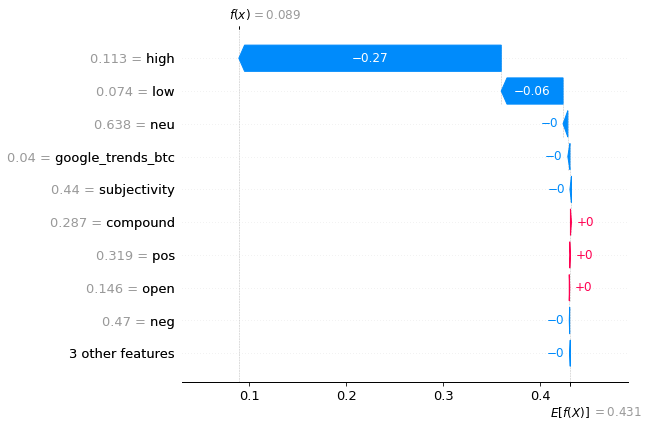

In [23]:
shap.plots.waterfall(shap_values[0]) # For the first observation

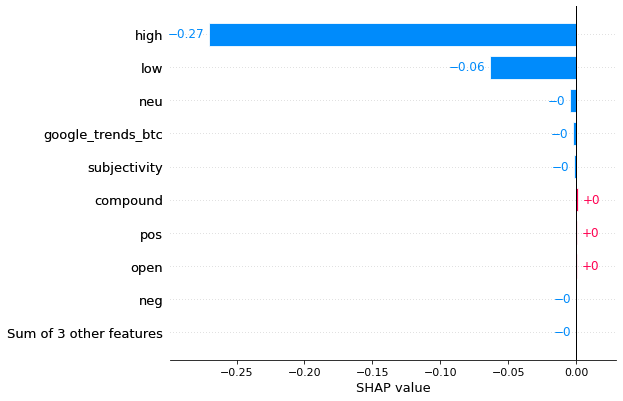

In [24]:
shap.plots.bar(shap_values[0]) # For the first observation

The expected value is  0.43098405


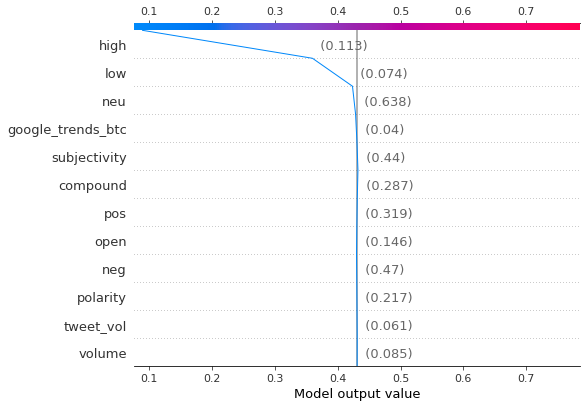

In [25]:
expected_value = explainer.expected_value
print("The expected value is ", expected_value)
shap_values = explainer.shap_values(X_test)[0]
shap.decision_plot(expected_value, shap_values, X_test)